Capstone Project: Sprint 2
<br>
<br>
Ankit Dheendsa - Friday August 18, 2023

The Capstone project we are undertaking is the interpretation and translation of American Sign Language (ASL) through the utilization of computer vision and machine learning. In this sprint (Sprint 2) we will focus on data exploration, statistical analysis and baseline modelling. 
<br>
<br>
Considering the data set we will be using was produced by myself (Ankit Dheendsa) data cleaning and preprocessing is minimally required as the data set has been recorded in accordance to the needs of this project. 
<br>
<br>
As stated above, Sprint 2 will consist of statistical analysis and baseline modelling. The statistical analysis we will be conducting is as follows:
<br>
- Basic Descriptive Statistics
- Correlation Analysis
- Logistic Regression
- Confusion Matrix
- Principle Component Analysis
<br>
<br>
And finally the baseline model we will be conducting and testing is a logistic regression to see the capability of the model to be able to predict a landmark position based on other landmark positions. This will give us an idea on how accurately the model will be able to predict what landmark coordinates are present when 1 is detected which would be able to then provide insight on the strength of the models capabilities to even predict specific sign symbols (as a sign symbol is simply a cumilation of landmark (joint) positions) 

First we will start with importing all necessary libraries and modules needed for this sprints analysis and modelling

In [2]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For logistic regression, confusion matrix and correlation matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


Instantiating new data frames with our datasets (one for each sign letter, with a total of 5 for the letters "A","N","K","I","T"), therefore there will be a total of 5 different data frames where the data is being derived from one of the 5 csv files 

In [4]:
# List of the csv file paths
csv_file_paths = ["CSV/A.csv","CSV/N.csv","CSV/K.csv","CSV/I.csv","CSV/T.csv"]

# Instantiating the data frames that are created from the corresponding CSV files (shown above) 
df_A = pd.read_csv("CSV/A.csv")
df_N = pd.read_csv("CSV/N.csv")
df_K = pd.read_csv("CSV/K.csv")
df_I = pd.read_csv("CSV/I.csv")
df_T = pd.read_csv("CSV/T.csv")

Basic Descriptive Statistics: Mean, Median, Mode and Standard Deviation for each landmark position for each sign

In [13]:
# Making the jupyter notebook output unlimited so we can see the full output (notebook was cutting off the output)
pd.set_option('display.max_rows', None)

# Create a for loop to iterate through each of the csv file paths we specified above in a list to be able to access each of the data files and then instantiate a new dataframe using that file path
# This method is more efficient since we are using a loop, we can use our individually instantiated variables later on when trying to access specific data frames, or if we want to put those in a list
for df_path in csv_file_paths:
    # read the csv file path and store in a temporary dataframe (temporary because it changes come the next iteration)
    df = pd.read_csv(df_path)
    
    # Formatting print statement
    print(f"Statistics for DataFrame: {df_path}")
    print("=======================================")
    
    # Here we get the columns that match the pattern of "Landmark (number)_(x/y)" that way we omit the image name column
    # We then store those results in a list so we can apply a conversion function later in one line
    landmark_columns = [col for col in df.columns if col.startswith("Landmark") and (col.endswith("_X") or col.endswith("_Y"))]
    
    # Now we convert the landmark_columns list into a numeric form (this way we make sure that specific data files that mightve been recorded as string objects are now floats)
    # We set the errors parameter to "coerce" so that any non numerical value is then classified as a NaN value, this way we dont get errors later on 
    # (this is a redundant step considering the data frames are clean of non numerical data other than the image name column)
    df[landmark_columns] = df[landmark_columns].apply(pd.to_numeric, errors="coerce")
    
    # Use a for loop to iterate through each of the 21 landmarks (0 to 20, since index starts at 0)
    for landmark in range(21):
        # Store a f string in a variable for easy calliung later on
        landmark_x = f'Landmark {landmark}_X'
        landmark_y = f'Landmark {landmark}_Y'
        # Store the dataframes landmark string in a new variable
        x_values = df[landmark_x]
        y_values = df[landmark_y]

        # Print out the specific landmark being assessed
        print(f"Landmark {landmark} X,Y:")
        # Print out the mean,median and standard deviation values (we use 2f to extend to 2 decimal points)
        print(f"Mean: {x_values.mean():.2f}, {y_values.mean():.2f}")
        print(f"Median: {x_values.median():.2f}, {y_values.median():.2f}")
        print(f"Standard Deviation: {x_values.std():.2f}, {y_values.std():.2f}")
        print("")

    # Formatting print statements
    print("=======================================")
    print("")  # Add an empty line between DataFrames


Statistics for DataFrame: CSV/A.csv
Landmark 0 X,Y:
Mean: 547.72, 517.70
Median: 546.00, 521.00
Standard Deviation: 28.48, 23.04

Landmark 1 X,Y:
Mean: 663.13, 624.55
Median: 668.00, 620.00
Standard Deviation: 24.43, 32.52

Landmark 2 X,Y:
Mean: 605.64, 555.86
Median: 604.00, 562.00
Standard Deviation: 29.29, 24.75

Landmark 3 X,Y:
Mean: 648.73, 619.03
Median: 652.00, 615.00
Standard Deviation: 21.44, 30.63

Landmark 4 X,Y:
Mean: 650.59, 564.77
Median: 648.00, 569.00
Standard Deviation: 28.89, 22.68

Landmark 5 X,Y:
Mean: 608.12, 592.08
Median: 612.00, 588.00
Standard Deviation: 22.54, 31.48

Landmark 6 X,Y:
Mean: 676.35, 545.67
Median: 673.00, 550.00
Standard Deviation: 30.50, 23.29

Landmark 7 X,Y:
Mean: 565.70, 607.69
Median: 569.00, 603.00
Standard Deviation: 23.24, 33.22

Landmark 8 X,Y:
Mean: 699.90, 514.93
Median: 696.00, 519.00
Standard Deviation: 32.97, 23.87

Landmark 9 X,Y:
Mean: 538.29, 595.53
Median: 540.00, 591.00
Standard Deviation: 25.25, 32.16

Landmark 10 X,Y:
Mean: 6

The output of this cell is highly specific and accurate, however it is fairly long and hard to derive noticeable trends from, so we will focus on using the above derived statistics and plotting it into 21 different scatter plots for each landmark to see what trends are visible when looking at the mean values of the x and y coordinates for each landmark for each sign.

Creating plots to visualize the similarities in coordinates for each landmark (based off the mean values derived from above from above)

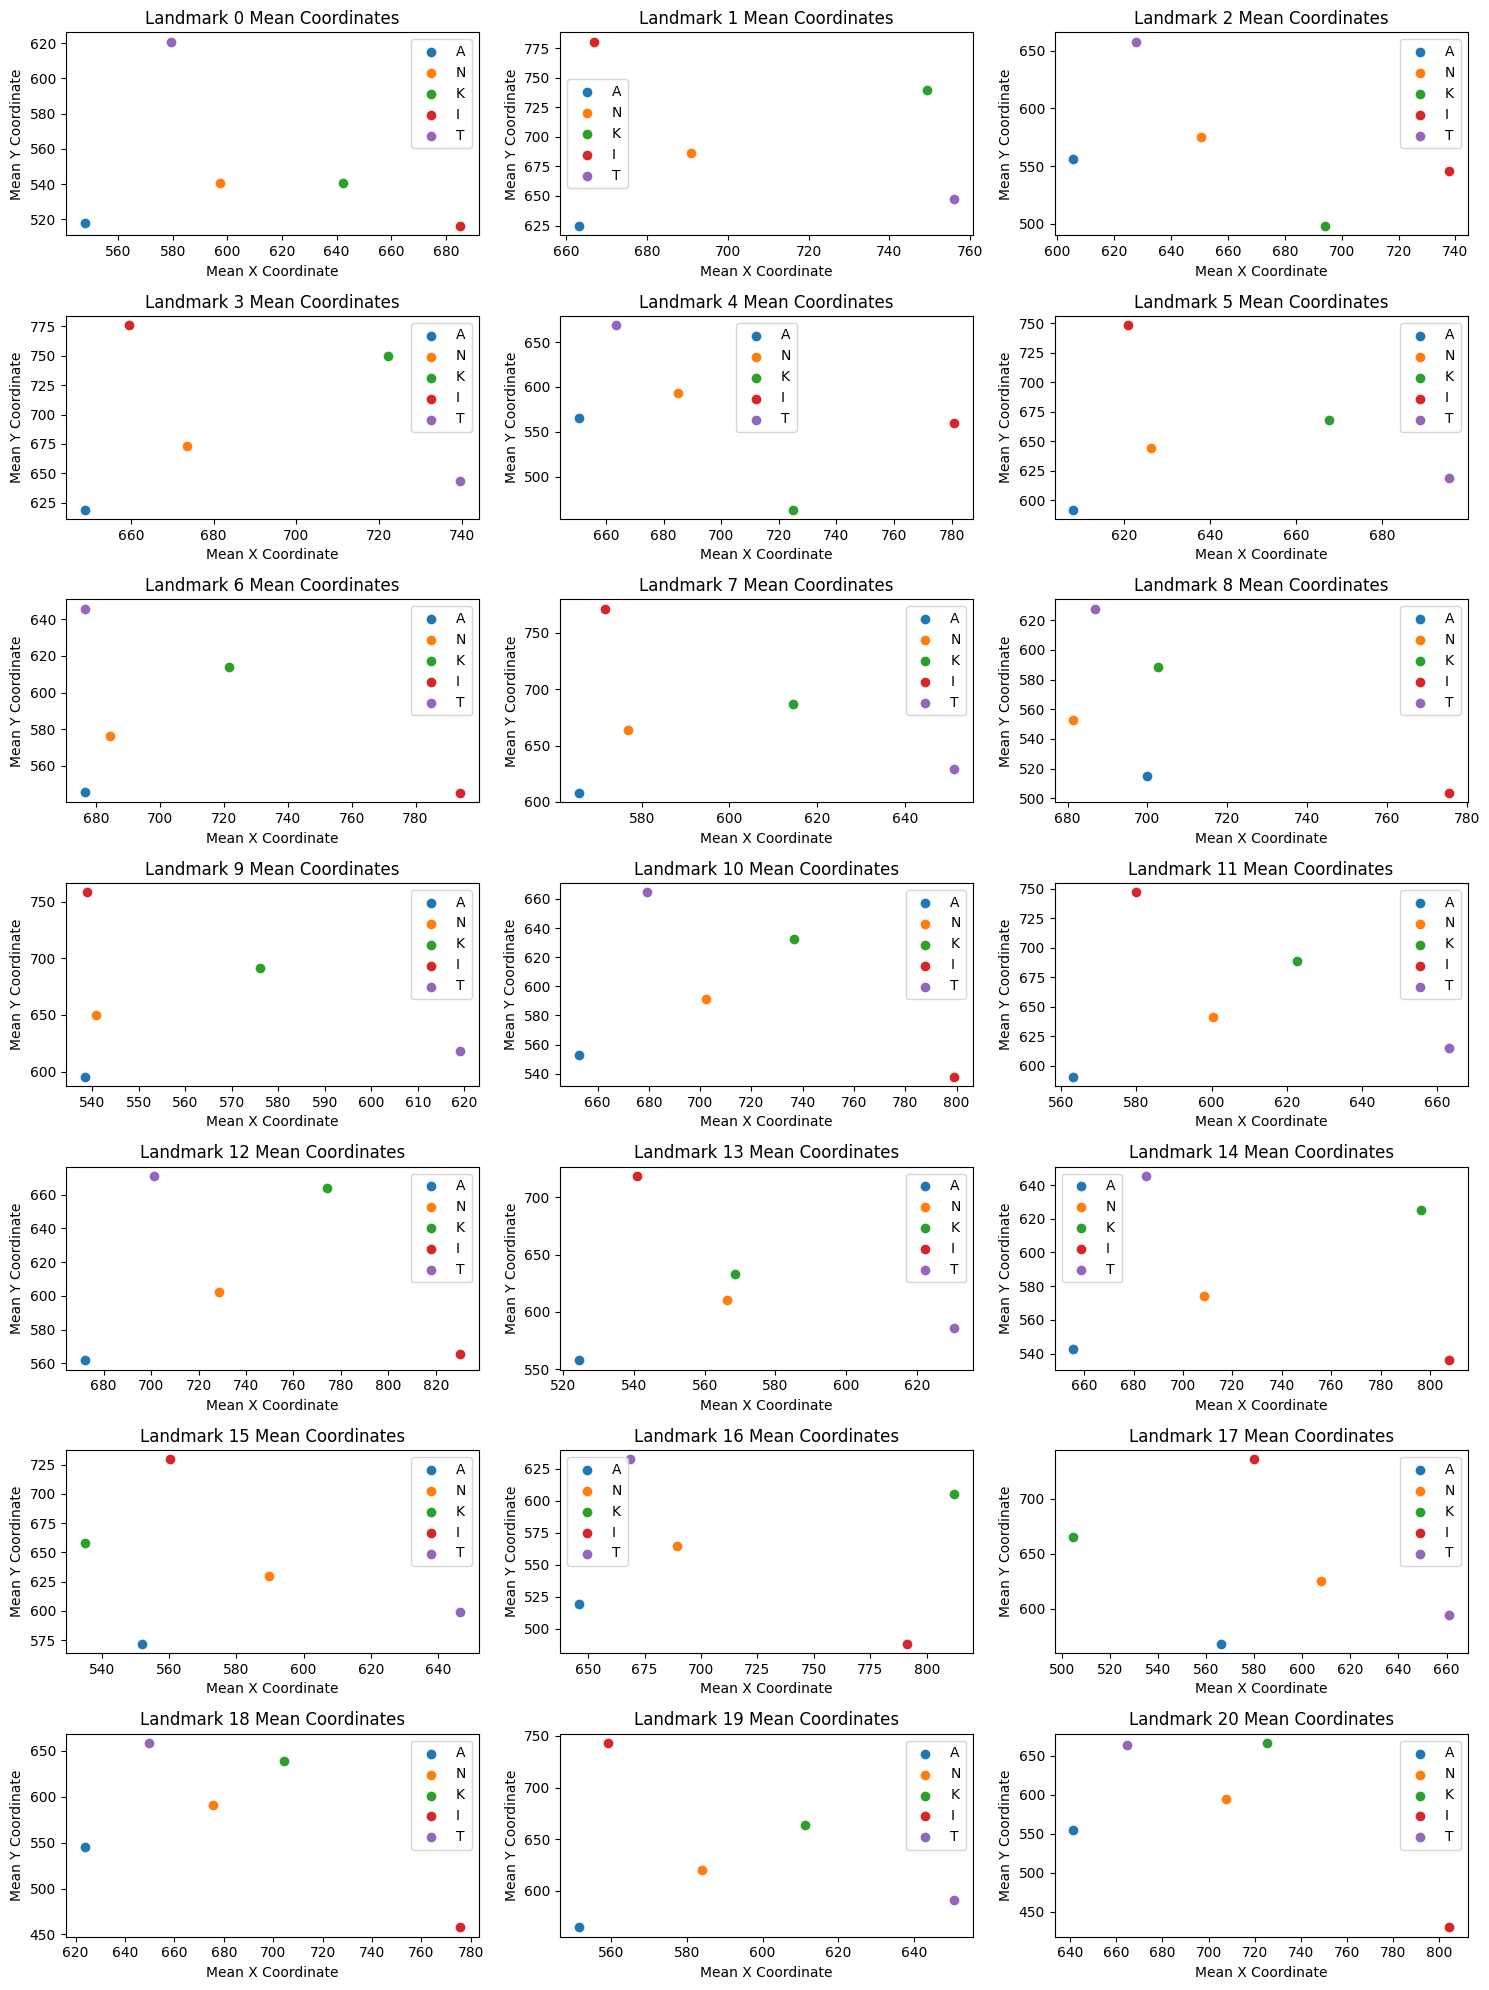

In [14]:
# Here we create a list of the data frames we instantiated at the beginning so it's easy to iterate through later on, as well as the corresponding labels for each hand sign
data_frames = [df_A, df_N, df_K, df_I, df_T]
df_labels = ['A', 'N', 'K', 'I', 'T']

# Create a 7x3 grid of subplots (to fit the 21 different plots for each landmark/joint in the hand)
fig, axs = plt.subplots(7, 3, figsize=(15, 20))
# Here we flatten the multidimensional array into a 1-dimensional array, allowing us to make subplots
axs = axs.flatten()

# We now use a for loop to iterate through each landmark
for landmark in range(21): 
    ax = axs[landmark]
    
    # Next we plot the mean X and Y coordinates for each data frame (to get the average x, y coordinates for each hand sign specific to the landmark that it's referring to)
    for df, label in zip(data_frames, df_labels):
        landmark_x = f'Landmark {landmark}_X'
        landmark_y = f'Landmark {landmark}_Y'

        # Convert the landmark columns to numeric, and handle any non-numeric values as NaN
        df[landmark_x] = pd.to_numeric(df[landmark_x], errors="coerce")
        df[landmark_y] = pd.to_numeric(df[landmark_y], errors="coerce")
        
        # Calculate mean only if the columns are numeric
        if df[landmark_x].dtype != object and df[landmark_y].dtype != object:
            x_mean = df[landmark_x].mean()
            y_mean = df[landmark_y].mean()
            
            ax.scatter(x_mean, y_mean, label=label)
    
    # Stating the plot labels
    ax.set_title(f'Landmark {landmark} Mean Coordinates')
    ax.set_xlabel('Mean X Coordinate')
    ax.set_ylabel('Mean Y Coordinate')
    ax.legend()

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


We can see that the information regarding the mean x,y coordinates are now much more clear for each landmark and for each sign. We can notice possible trends, an example being the letter "A" is typically on the lower side of the spectrum for both x and y values. We can attribute this to the fact that the physical sign for the letter "A" is a small sign in terms of the spread of the fingers (resembles the "rock" symbol in rock paper and scissors).

Moving on we construct a correlation analysis to identify the correlation between features (landmark positions) for all 5 signs

Correlation Analysis:

In [20]:
# Use a for loop to iterate through each data frame
# We use the zip function to iterate through multiple iterables
for df, df_name in zip(data_frames, df_labels):
    # Formatting print statement
    print(f"Correlation Matrix for DataFrame: {df_name}")
    print("=======================================")
    
    # We specify non-numeric columns (in our case it would be avoiding the image column) and save them in a list called numeric_columns
    numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    # Instantiate a new DataFrame with just the numeric columns
    df_numeric = df[numeric_columns]
    
  
    # Here we instantiate a correlation matrix using the .corr() function
    correlation_matrix = df_numeric.corr()
    print(correlation_matrix)
    
    print("=======================================")
    print("")  # Add an empty line between DataFrames


Correlation Matrix for DataFrame: A
               Landmark 0_X  Landmark 1_X  Landmark 2_X  Landmark 3_X  \
Landmark 0_X       1.000000      0.135381      0.979227      0.077127   
Landmark 1_X       0.135381      1.000000      0.167910      0.932213   
Landmark 2_X       0.979227      0.167910      1.000000      0.085527   
Landmark 3_X       0.077127      0.932213      0.085527      1.000000   
Landmark 4_X       0.946027      0.071762      0.975632      0.042540   
Landmark 5_X      -0.038645      0.764030     -0.049747      0.935798   
Landmark 6_X       0.886775     -0.055322      0.908490     -0.030885   
Landmark 7_X      -0.023261      0.626461     -0.065440      0.830736   
Landmark 8_X       0.809015     -0.141506      0.825798     -0.087495   
Landmark 9_X      -0.036710      0.445655     -0.092720      0.673730   
Landmark 10_X      0.871583     -0.104205      0.865345     -0.039202   
Landmark 11_X     -0.027486      0.697867     -0.046364      0.869802   
Landmark 12_X  

Similar to the statistical calculations we created, the output is fairly extensive and not the best when trying to discern trends so we will create a heatmap of the average correlation scores across all 5 signs (all 5 datasets). This way we can gain useful insights in one cohesive visual rather than having 5 different 42x42 matrices. All calculated/visualized results are derived from the cell above.

Averaged Correlation Heatmap (Across all 5 signs):

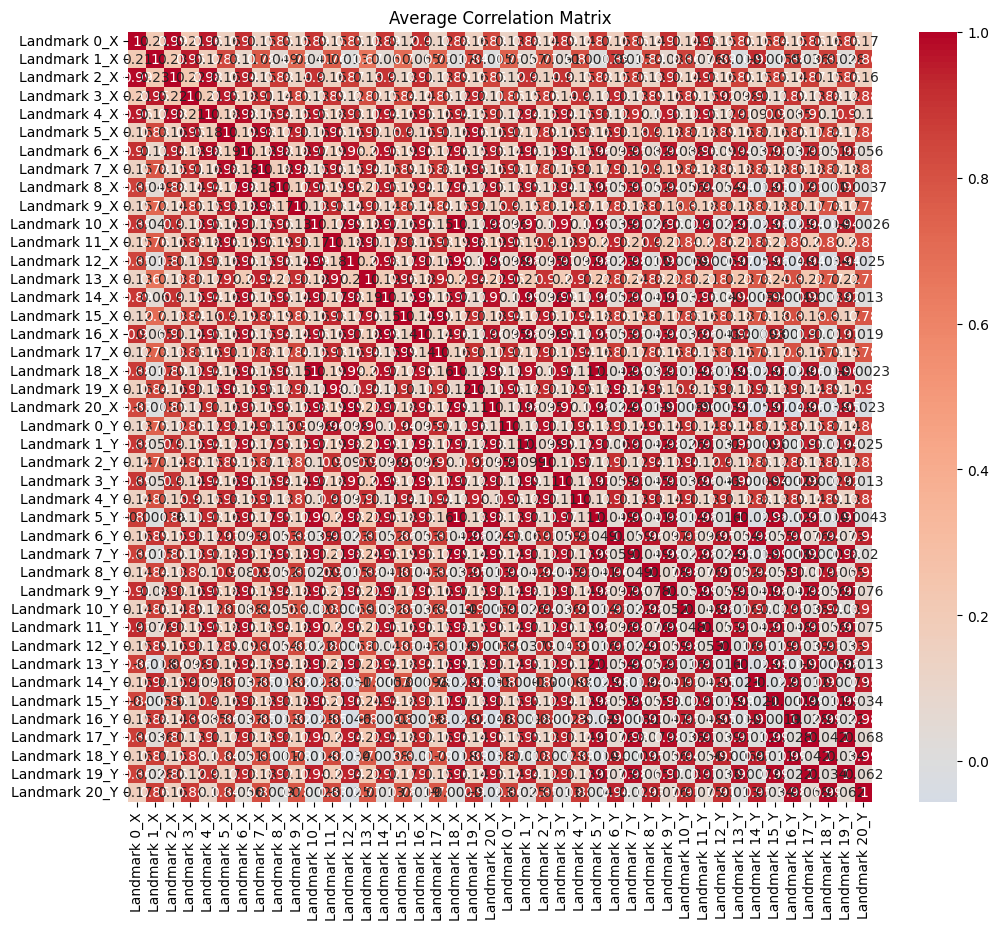

In [17]:
# Here we initialize a list to store the correlation matrices (there will be 5 42x42 matrices)
correlation_matrices_list = []


# Use a for loop similar to before to iterate through the csv file paths and instantiate new dataframes everytime to temporarily store the correlation data and then send it to the matrices list we created above
for df_path in csv_file_paths:
    df = pd.read_csv(df_path)
    
    # Similar to before we specify a match pattern to target landmark specific columns
    landmark_columns_repeat = [col for col in df.columns if col.startswith("Landmark") and (col.endswith("_X") or col.endswith("_Y"))]
    
    # Next we convert the landmark columns to numeric values
    # Note that we use the name "landmark_columns_repeat" as we previously used the same name so by adding the "_repeat" we ensure that there are no merge errors, or wrongful data being stores
    df[landmark_columns_repeat] = df[landmark_columns_repeat].apply(pd.to_numeric, errors="coerce")
    
    # Here we instantiate a correlation matrix variable using the .corr() function (same way we did above when we created our first correlation matrix)
    # Note we are creating redundant steps to ensure the correct/clean dataframes are being used in the analysis/visualizations 
    correlation_matrix_repeat = df[landmark_columns_repeat].corr()
    
    # Add the correlation matrix to the list we created above
    correlation_matrices_list.append(correlation_matrix_repeat)

# Calculate the average correlation matrix using the list created above
average_correlation_matrix = sum(correlation_matrices_list) / len(correlation_matrices_list)

# Create a heatmap using Seaborn to plot out the average correlation matrix across all landmarks
plt.figure(figsize=(12, 10))
sns.heatmap(average_correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Average Correlation Matrix")
plt.show()

Off the bat we can notice a few trends, one being all mirror pairs (e.g, Landmark 20_Y,Landmark 20_Y) have a correlation score of 1, this is due to the fact that they are the same and are always the same so we can automatically omit the diagonal trend starting from the top left of the heat map. Moving on we notice a wide variety of medium correlation scores as well as 0 correlation scores which shows a wide diversity of correlation amongsts features. This is a great visual to start diving deeper into to determine what exact combinations of features have the most profound effect on others as this could assist in the optimization of an algorithm to determine a hand sign faster than normal 

Next we will be conducting a logistic regression as a means of predicting one landmark position based on others.

Logistic Regression:

In [18]:
# Here we are adding a target column (since its a multi class model we wont use a binary column but instead a label classification column)
# The target column will be called "Sign" and will consist of the 5 different sign symbols we have
df_A['Sign'] = 'A'
df_N['Sign'] = 'N'
df_K['Sign'] = 'K'
df_I['Sign'] = 'I'
df_T['Sign'] = 'T'

# Combine all data frames into a single DataFrame along with their corresponding labels (so now all the 5 dataframes are in one with a new column of "Sign" this way we have a 10,000 image dataset with the various classes/labels)
combined_df = pd.concat([df_A, df_N, df_K, df_I, df_T], ignore_index=True)

# Encode the target labels as a means of handling string object data and store in an encoded variable called "y_encoded"
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(combined_df['Sign'])

# Here we want to drop the image name column and the sign column from the feature matrix and store it in a variable "X" which will be used for our training set
X = combined_df.drop(["Image", "Sign"], axis=1)

# Next we split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# As a redundancy measure, if there are any missing values we populate it with the mean for the numerical columns
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Next we initialize and train a logistic regression model for multiclass classification (multiclass since the target variable isnt binary)
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train_encoded)

# Now we make predictions and store in a variable
y_pred_encoded = model.predict(X_test)

# Next we inverse transform the encoded predictions to original labels 
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Same as y_pred we inverse transform the encoded test labels to original labels
y_test = label_encoder.inverse_transform(y_test_encoded)

# Finally we can generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       409
           I       1.00      1.00      1.00       396
           K       1.00      1.00      1.00       393
           N       1.00      0.99      0.99       407
           T       0.98      0.98      0.98       396

    accuracy                           0.99      2001
   macro avg       0.99      0.99      0.99      2001
weighted avg       0.99      0.99      0.99      2001



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From the logistic regression classification report we notice high scores across the board for precision, recall, f1 score and accuracy. This is an indicator that the logistic regression model was extremely accurate in predictions and can be contributed to the fact that the datasets were custom made and therefore of the highest quality in terms of cleanliness. Considering each dataframe is 2000 numerical rows of a single hand sign, the model must have had an easy time classifying them with their classification columns.

Moving on, we will construct a confusion matrix to evaluate the performance of the logistic regression model. The confusion matrix will show us the number of the instances for True Positives, True Negatives, False Positives and False Negatives.

Confusion Matrix: Evaluating performance of logistic regression model

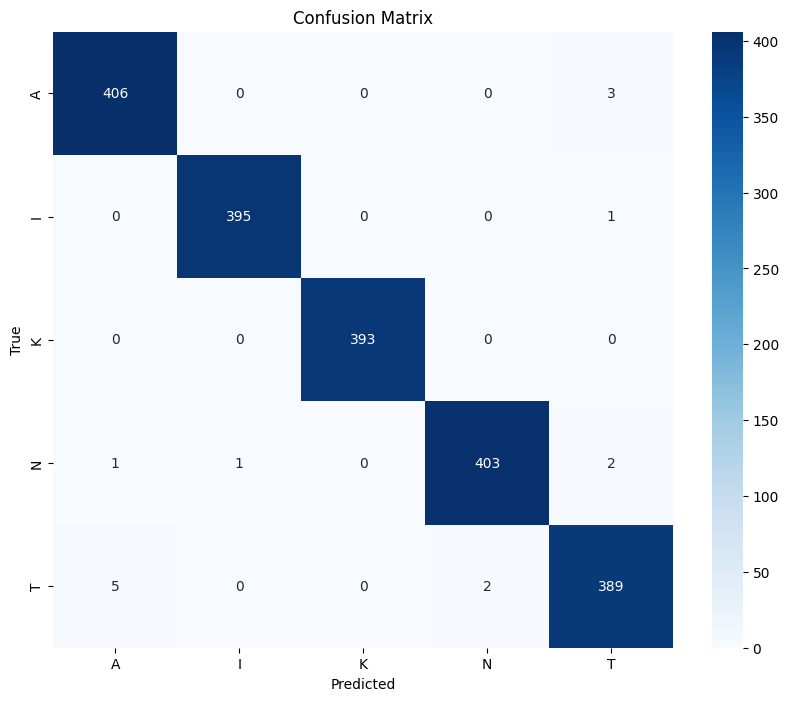

In [19]:
# We will instantiate a confusion matrix into a variable using the "confusion_matrix" function
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Next we will plot the matrix using seaborn 
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()